# Teste A/B e análise de hipóteses - Markepalce Y.Afish


Este projeto tem como objetivo otimizar as despesas de marketing da empresa Y.Afisha, por meio da análise de dados. A análise será dividida em duas seções principais, cada uma focada em uma etapa específica do projeto.


* Parte 1: Priorização de Hipóteses

    Nesta parte do projeto, iremos priorizar uma lista de hipóteses que podem ajudar a aumentar a receita da loja online. Utilizaremos os dados fornecidos no arquivo "hypotheses_us.csv", que contém nove hipóteses com métricas de alcance, impacto, confiança e esforço associadas a cada uma delas.

    A tarefa consiste em aplicar os frameworks ICE e RICE para priorizar as hipóteses. Será necessário classificá-las em ordem decrescente de prioridade em ambos os frameworks. Além disso, iremos comparar como a priorização é alterada ao usar o framework RICE em vez do ICE e fornecer uma explicação para as alterações observadas.



* Parte 2: Análise de Teste A/B
    Nesta parte do projeto, iremos analisar os resultados de um teste A/B realizado pela equipe de marketing. Os dados do teste estão disponíveis nos arquivos "orders_us.csv" e "visits_us.csv". O objetivo é analisar o desempenho das diferentes variantes do teste A/B em termos de receita, tamanho médio do pedido, taxa de conversão e outros aspectos relevantes.

    As tarefas nesta seção incluem a criação de gráficos para visualizar a receita acumulada por grupo, o tamanho médio do pedido, a diferença relativa no tamanho médio do pedido entre os grupos, a taxa de conversão diária e a diferença relativa na conversão cumulativa entre os grupos. Também iremos calcular os percentis 95 e 99 para o número de pedidos por usuário e para os preços dos pedidos.

    Em seguida, iremos avaliar a significância estatística das diferenças encontradas e tomar uma decisão com base nos resultados do teste.

## Parte 1 - Priorização de hipóteses

Nesta seção do projeto, iremos trabalhar com o arquivo "hypotheses_us.csv", que contém nove hipóteses para aumentar a receita de uma loja online. Cada hipótese é acompanhada por métricas de alcance (Reach), impacto (Impact), confiança (Confidence) e esforço (Effort), que foram especificadas para cada uma delas.

A tarefa principal é aplicar dois frameworks de priorização, ICE e RICE, para classificar as hipóteses em ordem decrescente de prioridade. O framework ICE leva em consideração o impacto, confiança e esforço de cada hipótese, enquanto o framework RICE também considera o alcance como um fator adicional.

Após aplicar ambos os frameworks, iremos comparar a priorização das hipóteses e observar como ela é alterada quando utilizamos o framework RICE em vez do ICE. Essa comparação nos permitirá entender como o fator de alcance influencia a priorização das hipóteses.

Ao final desta seção, iremos fornecer uma explicação para as alterações na priorização e discutir a importância do alcance na seleção das hipóteses prioritárias.

Vamos começar aplicando o framework ICE para classificar as hipóteses em ordem decrescente de prioridade.


O passo a passo será feito por:

* importar bibliotecas
* importar dados
* pré análise dos dados
* limpeza dos dados
* aplicação do framework e geração de resultados

### Importar bibliotecas

Iremos inicialmente importar as bibliotecas:

* pandas
* numpy
* matplotlib para gráficos
* from scipy import stats para testes estatísticos

In [757]:
# importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Importar dados

In [758]:
# importando os dados necessários

# abrindo a tabela hypotheses_us.csv

# Carregando dados no computador pessoal
try:
    df_hyp = pd.read_csv(r'download/datasets/hypotheses_us.csv', sep = ';')
    
# Carregando dados no JupyterHub
except:
    df_hyp = pd.read_csv(r'/datasets/hypotheses_us.csv', sep = ';')

### Pré análise dos dados

In [759]:
# mostrando df
df_hyp.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [760]:
# informações de df
df_hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [761]:
print(df_hyp['Hypothesis'])

0    Add two new channels for attracting traffic. T...
1    Launch your own delivery service. This will sh...
2    Add product recommendation blocks to the store...
3    Change the category structure. This will incre...
4    Change the background color on the main page. ...
5    Add a customer review page. This will increase...
6    Show banners with current offers and sales on ...
7    Add a subscription form to all the main pages....
8    Launch a promotion that gives users discounts ...
Name: Hypothesis, dtype: object


**Conclusão Intermediária**

Podemos ver que os dados estão nos tipos corretos.

A única correção que iremos fazer é separar os dados da coluna Hypothesis, pois no modelo proposto tem se em uma coluna o seguinte padrão 

Ação + '.' + Reação

Por exemplo na primeira linha:

- Adicionar dois canais. Irá gerar....


Assim iremos separar tudo que está após o ponto.

Além disso, iremos deixar as colunas fora do modelo snake_case para essa parte do projeto.

### Limpeza dos dados

In [762]:
# Extrair o texto após o ponto e adicionar à coluna "Reaction"
df_hyp['Reaction'] = df_hyp['Hypothesis'].str.split('.').str[1].str.strip()

# Remover a parte após o ponto da coluna "Hypothesis"
df_hyp['Hypothesis'] = df_hyp['Hypothesis'].str.split('.').str[0].str.strip()

In [763]:
# mostrando df
df_hyp.head()

,Hypothesis,Reach,Impact,Confidence,Effort,Reaction
0,Add two new channels for attracting traffic,3,10,8,6,This will bring 30% more users
1,Launch your own delivery service,2,5,4,10,This will shorten delivery time
2,Add product recommendation blocks to the store...,8,3,7,3,This will increase conversion and average purc...
3,Change the category structure,8,3,3,8,This will increase conversion since users will...
4,Change the background color on the main page,3,1,1,1,This will increase user engagement


**Conclusão**

Agora podemos ver que a Dataframe ficou mais limpa temos dados separados pela hipótese e pela reação que poderia gerar a partir desta hipótese. Iremos prosseguir para a análise RICE E ICE proposto.

### Análise dos dados de hipótese

Iremos agora utilizar os frameworks RICE e ICE para gerar uma prioridade para as hipóteses geradas pela equipe.

Iremos classificar ambos em ordem decrescente.

### Framework RICE

In [764]:
# Criando uma cópia de nossa df para framework RICE
df_rice = df_hyp.copy()

In [765]:
# Aplicando o framework

df_rice['RICE'] = (df_rice['Reach']*df_rice['Impact']*df_rice['Confidence'])/df_rice['Effort']

df_rice['RICE'] = df_rice['RICE'].astype(int)

df_rice[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages,112
2,Add product recommendation blocks to the store...,56
0,Add two new channels for attracting traffic,40
6,Show banners with current offers and sales on ...,40
8,Launch a promotion that gives users discounts ...,16
3,Change the category structure,9
1,Launch your own delivery service,4
5,Add a customer review page,4
4,Change the background color on the main page,3


**Conclusão**

Podemos tirar as seguintes conclusões:

* A hipótese "Add a subscription form to all the main pages" possui a pontuação RICE mais alta, com um valor de 112.0. Isso indica que essa hipótese tem um alto potencial de impacto, confiança e alcance, considerando um esforço moderado. Portanto, essa hipótese pode ser considerada como uma das principais prioridades para implementação.

* As hipóteses "Add product recommendation blocks to the store..." e "Show banners with current offers and sales on..." possuem pontuações RICE iguais, com um valor de 56.0. Isso indica que ambas as hipóteses têm um bom potencial de impacto, confiança e alcance, considerando um esforço moderado. Essas hipóteses também são consideradas como prioridades, embora um pouco abaixo da primeira hipótese.

* As hipóteses "Add two new channels for attracting traffic" e "Launch a promotion that gives users discounts..." possuem pontuações RICE mais baixas, com valores de 40.0 e 16.2, respectivamente. Isso indica que essas hipóteses têm um potencial de impacto e confiança moderados, mas com um alcance mais limitado. No entanto, considerando o esforço necessário, ainda podem ser consideradas como opções viáveis para implementação.

* As hipóteses restantes - "Change the category structure", "Launch your own delivery service", "Add a customer review page" e "Change the background color on the main page" - possuem pontuações RICE mais baixas, indicando menor potencial de impacto, confiança e alcance em relação às outras hipóteses. Portanto, essas hipóteses podem ser consideradas como de menor prioridade para implementação.

Em resumo, com base nos resultados do teste RICE, recomenda-se priorizar as hipóteses com pontuações mais altas, pois elas apresentam um maior potencial de impacto e eficiência considerando o alcance, confiança e esforço envolvidos.

### Framework ICE

In [766]:
# Criando uma cópia de nossa df para framework RICE
df_ice = df_hyp.copy()

In [767]:
# Aplicando o framework

df_ice['ICE'] = (df_ice['Impact']*df_ice['Confidence'])/df_ice['Effort']

df_ice['ICE'] = df_ice['ICE'].astype(int)

df_ice[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16
0,Add two new channels for attracting traffic,13
7,Add a subscription form to all the main pages,11
6,Show banners with current offers and sales on ...,8
2,Add product recommendation blocks to the store...,7
1,Launch your own delivery service,2
3,Change the category structure,1
4,Change the background color on the main page,1
5,Add a customer review page,1


**Conclusão**

Podemos tirar as seguintes conclusões:

* A hipótese com a maior pontuação ICE é "Launch a promotion that gives users discounts" com uma pontuação de 16. Isso indica que essa hipótese tem um alto potencial de impacto, confiança e exigirá um esforço moderado para implementação.

* As hipóteses "Add two new channels for attracting traffic" e "Add a subscription form to all the main pages" também obtiveram pontuações elevadas, com 13 e 11 respectivamente. Isso sugere que essas hipóteses também têm um potencial significativo de impacto e confiança, embora o esforço necessário para implementação possa variar.

* As hipóteses "Show banners with current offers and sales on..." e "Add product recommendation blocks to the store..." obtiveram pontuações moderadas, indicando um potencial de impacto e confiança razoáveis, com um esforço menor em comparação com as hipóteses anteriores.

* As hipóteses restantes (Launch your own delivery service, Change the category structure, Change the background color on the main page, Add a customer review page) obtiveram pontuações mais baixas. Isso sugere que essas hipóteses podem ter um potencial de impacto e confiança limitados, além de exigirem um esforço maior para implementação.

Com base nessas conclusões, recomenda-se que a empresa dê prioridade às hipóteses com pontuações mais altas no framework ICE, pois elas apresentam um potencial maior de impacto e confiança.

### Comparativo ICE x RICE

Para melhor visualização iremos juntar as duas dataframes para melhor observação.

In [768]:
# merge nas dfs

# Juntar as colunas "Hypothesis" e "ICE" do DataFrame df_ice com as colunas "Hypothesis" e "RICE" do DataFrame df_rice
df_merged = df_ice[['Hypothesis', 'ICE']].merge(df_rice[['Hypothesis', 'RICE']], on='Hypothesis', how='inner')

# Exibir o DataFrame resultante
df_merged

,Hypothesis,ICE,RICE
0,Add two new channels for attracting traffic,13,40
1,Launch your own delivery service,2,4
2,Add product recommendation blocks to the store...,7,56
3,Change the category structure,1,9
4,Change the background color on the main page,1,3
5,Add a customer review page,1,4
6,Show banners with current offers and sales on ...,8,40
7,Add a subscription form to all the main pages,11,112
8,Launch a promotion that gives users discounts ...,16,16


### Conclusão


O framework ICE é um método de priorização de hipóteses que considera três componentes: Impacto, Confiança e Esforço. Nós calculamos a pontuação ICE multiplicando o Impacto pela Confiança e dividindo pelo Esforço.

Já o framework RICE adiciona um quarto componente à equação ICE: Alcance. Nós calculamos a pontuação RICE multiplicando o Impacto, a Confiança e o Alcance e dividindo pelo Esforço.

Ao compararmos as duas pontuações (RICE e ICE) da nossa tabela, podemos ver que a priorização de hipóteses sofre uma mudança significativa.

Por exemplo, a hipótese "Adicionar um formulário de inscrição a todas as principais páginas" (índice 7) possui uma pontuação ICE de 11, mas uma pontuação RICE muito maior, de 112. Isso sugere que, embora o impacto, a confiança e o esforço possam ser moderados, o alcance dessa alteração é provavelmente muito alto, podendo afetar uma grande proporção de usuários.

Da mesma forma, a hipótese "Lançar uma promoção que dá descontos aos usuários" (índice 8) possui uma pontuação ICE alta de 16, mas uma pontuação RICE igual a 16. Isso indica que o alcance dessa hipótese é relativamente baixo, e mesmo que o impacto, a confiança e o esforço sejam favoráveis, essa mudança só afetará uma pequena proporção de usuários.

Portanto, ao utilizarmos RICE em vez de ICE, estamos considerando uma visão mais abrangente do impacto potencial das mudanças, levando em conta não apenas a magnitude do impacto, a confiança na estimativa e o esforço necessário, mas também o número de usuários que serão afetados. Isso pode levar a uma re-priorização das hipóteses, como podemos observar na tabela fornecida.

## Parte 2 - Teste A/ B

Nesta seção do projeto, iremos analisar os resultados de um teste A/B realizado em sua empresa. Os dados do teste estão disponíveis nos arquivos "orders_us.csv" e "visitors_us.csv".

A análise do teste A/B é essencial para avaliar o desempenho das diferentes variantes (grupo A e grupo B) e tomar decisões estratégicas com base nos resultados obtidos. Para isso, vamos realizar uma série de análises e visualizações dos dados.

Aqui está o passo a passo que iremos seguir:

1. Faremos um gráfico da receita acumulada por grupo. Essa análise nos ajudará a compreender se há diferenças significativas na geração de receita entre os grupos A e B. Com base nessa análise, poderemos tirar conclusões e criar conjecturas sobre a eficácia das variantes.

2. Em seguida, faremos um gráfico do tamanho médio acumulado do pedido por grupo. Essa análise nos permitirá observar se o tamanho dos pedidos varia entre os grupos A e B ao longo do tempo. Novamente, com base nessa análise, poderemos tirar conclusões e criar conjecturas sobre o comportamento dos usuários em relação ao valor gasto.

3. Faremos um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A. Essa análise nos ajudará a identificar se há uma diferença significativa entre os grupos em termos do valor médio dos pedidos. A partir dessa análise, poderemos tirar conclusões e criar conjecturas sobre possíveis tendências de gastos dos usuários.

4. Calcularemos a taxa de conversão de cada grupo, ou seja, a proporção de pedidos para o número de visitas em cada dia. Traçaremos as taxas de conversão diárias dos dois grupos e descreveremos as diferenças observadas. Com base nessa análise, poderemos tirar conclusões e criar conjecturas sobre a eficácia das variantes em converter visitas em pedidos.

5. Faremos um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Essa análise nos ajudará a identificar se há uma diferença significativa na taxa de conversão acumulada entre os grupos. Com base nessa análise, poderemos tirar conclusões e criar conjecturas sobre a eficácia das variantes em gerar conversões ao longo do tempo.

6. Calcularemos os percentis 95 e 99 para o número de pedidos por usuário. Definiremos o ponto em que um ponto de dados se torna uma anomalia. Essa análise nos ajudará a identificar possíveis valores extremos ou comportamentos incomuns relacionados ao número de pedidos por usuário.

7. Faremos um gráfico de dispersão dos preços dos pedidos. Com essa análise, poderemos identificar possíveis padrões ou agrupamentos nos preços dos pedidos e tirar conclusões a partir dessas observações.

8. Calcularemos os percentis 95 e 99 dos preços dos pedidos. Definiremos o ponto em que um ponto de dados se torna uma anomalia. Essa análise nos ajudará a identificar valores extremos ou discrepantes nos preços dos pedidos.

9. Encontraremos a significância estatística da diferença na conversão

 entre os grupos usando os dados brutos. Com base nessa análise, poderemos avaliar se há uma diferença estatisticamente significativa na taxa de conversão entre os grupos A e B.

10. Encontraremos a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Essa análise nos ajudará a determinar se há uma diferença estatisticamente significativa no valor médio dos pedidos entre os grupos A e B.

11. Encontraremos a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Com base nessa análise, poderemos avaliar se a diferença na taxa de conversão entre os grupos A e B é estatisticamente significativa após a aplicação de filtros ou exclusão de outliers.

12. Encontraremos a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Essa análise nos ajudará a determinar se a diferença no valor médio dos pedidos entre os grupos A e B é estatisticamente significativa após a aplicação de filtros ou exclusão de outliers.

Por fim, com base em todas as análises e conclusões obtidas, tomaremos uma decisão sobre o teste. Essa decisão pode ser: 1) parar o teste e considerar um dos grupos como líder, 2) parar o teste e concluir que não há diferença significativa entre os grupos, ou 3) continuar o teste para obter mais dados e insights.

Essas etapas nos ajudarão a compreender melhor os resultados do teste A/B e fornecerão subsídios importantes para a tomada de decisões estratégicas relacionadas à otimização dos recursos e maximização dos resultados da sua empresa.

O passo a passo será feito por:

* importar bibliotecas
* importar dados
* pré análise dos dados
* limpeza dos dados
* aplicação dos testes e geração de resultados

### Importar bibliotecas

In [769]:
# importando bibliotecas adicionais - já importamos pandas & numpy


### Importando dados

In [770]:
# abrindo a tabela orders_us.csv

# Carregando dados no computador pessoal
try:
    df_orders = pd.read_csv(r'download/datasets/orders_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_orders = pd.read_csv(r'/datasets/orders_us.csv')

In [771]:
# abrindo a tabela visitors_us.csv.

# Carregando dados no computador pessoal
try:
    df_visits = pd.read_csv(r'download/datasets/visitors_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_visits = pd.read_csv(r'/datasets/visitors_us.csv')

### Pré análise dos dados e limpeza

#### Dados de Orders_us

In [772]:
# mostrando dados
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [773]:
# informações de df
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


**Conclusão Intermediária**

De primeiro momento pode-se observar que não há um grande erro definitivo na tabela.

Não há dados faltantes, a única correção seria a transformação da tabela date para Datetime.

Iremos verificar se há algum visitorId que está inserido nos dois grupos, caso ele esteja iremos analisar o volume e retirar se possível, pois irá sujar nossa amostra.

In [774]:
# Filtrando os visitorId únicos para cada grupo
visitorId_group_A = set(df_orders[df_orders['group'] == 'A']['visitorId'].unique())
visitorId_group_B = set(df_orders[df_orders['group'] == 'B']['visitorId'].unique())

# Verificando os visitorId presentes em ambos os grupos
visitorId_both_groups = visitorId_group_A.intersection(visitorId_group_B)

# Calculando a contagem total de visitorId em ambos os grupos
contagem_visitorId = len(visitorId_both_groups)

# Exibindo os visitorId presentes em ambos os grupos
print("VisitorId presentes em ambos os grupos A e B:")
for visitorId in visitorId_both_groups:
    print(visitorId)

print(f'Número de ids é de {contagem_visitorId}')

VisitorId presentes em ambos os grupos A e B:
3957174400
3984495233
2780786433
1294878855
1648269707
1614305549
4120364173
232979603
199603092
4266935830
2712142231
2587333274
2716752286
3891541246
1668030113
2654030115
3234906277
1230306981
1404934699
3803269165
2949041841
237748145
457167155
2927087541
1738359350
3062433592
3656415546
818047933
393266494
963407295
471551937
2579882178
3202540741
2686716486
1333886533
2044997962
3941795274
1801183820
2378935119
4256040402
4069496402
3766097110
8300375
351125977
1602967004
276558944
2038680547
3951559397
3963646447
4186807279
3717692402
1959144690
2458001652
2600415354
2954449915
1316129916
477780734
3972127743
Número de ids é de 58


**Conclusão Intermediária** 

Iremos retirar esses ids das amostrar e observar como vai se comportar a dataframe. Se ira diminuir muito o número de valores que possam afetar nossos testes.

In [775]:
# Removendo os IDs em ambos os grupos da DataFrame original
df_orders = df_orders[~df_orders['visitorId'].isin(visitorId_both_groups)]

# Exibindo a nova DataFrame sem os IDs em ambos os grupos
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1016 non-null   int64  
 1   visitorId      1016 non-null   int64  
 2   date           1016 non-null   object 
 3   revenue        1016 non-null   float64
 4   group          1016 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 47.6+ KB


**Conclusão**

Podemos ver que estatísticamente esse grupo retirado corresponde a um total, aproximado, de 10% do inicial. Esse valor é considerável, mas como os usuários participaram de ambos os grupos eles iriam sujar a amostra, pois poderiam gerar disturbios em suas ações dependendo de qual grupo estariam.

Logo iremos decidir por ficar com o espaço amostral filtrado. Iremos agora como último passo transformar a coluna **date** em Datetime

In [776]:
# Transformar a coluna "date" para o formato datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])

#### Dados de df_visits

In [777]:
# mostrando df
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [778]:
# informação df
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Conclusão Intermediária**

Podemos ver que a dataframe não é muito complexa, não tem valores nulos, e sua estrutura é simples de ler. O único ponto é que a coluna date não está formatada da maneira correta.

Iremos, por via de precaução, retirar duplicatas, para mitigar o risco de que haja dados dos grupos com dias repitidos e análisar se há uma mudança evidente no volume de dados. 

In [779]:
# criando copia teste
df_test = df_visits.copy()

# removendo duplicatas
df_test.drop_duplicates()

# infos
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Conclusão**

Pelo nosso teste sabemos que não há dados duplicados, então parecem estar em boas condições para continuação. Iremos verificar agora se há dois grupos de fato (por via de precaução) e transformar a coluna date para date time

In [780]:
# verificando coluna group
df_visits['group'].unique()

array(['A', 'B'], dtype=object)

In [781]:
# Transformar a coluna "date" para o formato datetime
df_visits['date'] = pd.to_datetime(df_visits['date'])

In [782]:
# info de df
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Resultados dos testes A/B

Nessa seção iremos apresentar os dados e gráficos retirados dos testes A/B realizados pela equipe.

Primeiramente, para recordar com maior clareza e rever os dados iremos chamar as Dataframes que limpamos para relemebrar e começar nossos testes

In [783]:
# Chamando df_orders

df_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [784]:
# Chamando df_visits

df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Iremos iniciar com nossa análise dos testes A/B realizados.

#### Gráfico da receita acumulada por grupo

In [785]:
# agrupando receita por grupo

rev_group = df_orders.groupby('group')['revenue'].sum().reset_index()

# chamando a df gerda
rev_group

,group,revenue
0,A,53212.0
1,B,79651.2


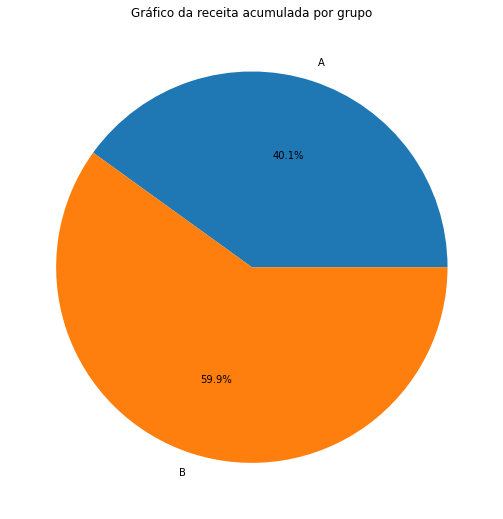

In [786]:
# gerando gráfico

# Gerando gráfico
plt.figure(figsize=(16, 9))

# extrair dados do DataFrame
labels = rev_group['group']
valor = rev_group['revenue']

# Criar o gráfico de pizza
plt.pie(valor, labels=labels, autopct='%1.1f%%')

# Configurar título do gráfico
plt.title('Gráfico da receita acumulada por grupo')

# Exibir o gráfico
plt.show()

**Conclusão**

Como conclusão podemos tirar que:

* O Grupo B gerou mais receita acumulada com um total de, aproximadamente, 60% do total.

* O Grupo A tem receita 20% menor que o Grupo B, uma diferença interessante

* O testes realizados com o Grupo B geram mais receita.

#### Gráfico do ticket médio acumulado do pedido por grupo.

Em nosso documento de solicitação de análise foi pedido o 'tamanho médio', ao analisar podemos entender que no contexto se refere ao Ticket Médio. Iremos utilizar essa premissa para continuar.

In [787]:
# agrupando receita média por grupo

rev_mean_group = df_orders.groupby('group')['revenue'].mean().reset_index()

# chamando a df gerda
rev_mean_group

,group,revenue
0,A,113.700855
1,B,145.348905


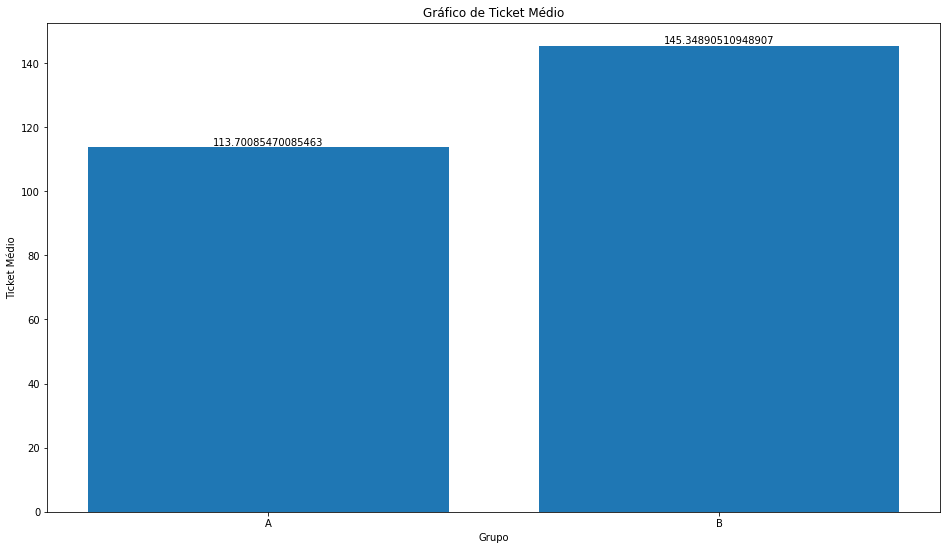

In [788]:
# Gerando gráfico
plt.figure(figsize=(16, 9))

# Criar o gráfico de barras
plt.bar(rev_mean_group['group'], rev_mean_group['revenue'])

# Adicionar os valores nas barras
for i, value in enumerate(rev_mean_group['revenue']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Configurar título do gráfico
plt.title('Gráfico de Ticket Médio')

# Configurar rótulos dos eixos
plt.xlabel('Grupo')
plt.ylabel('Ticket Médio')

# Exibir o gráfico
plt.show()

**Conclusões**

Como conclusão podemos tirar que:

* O Grupo B além de gerar mais receita, apresenta um maior Ticket Médio nos pedidos.

* Talvez o crescimento da receita está sendo afetada pelo crescimento do Ticket Médio. 

* O Ticket Médio do grupo B é, aproximadamente, 30% maior que o grupo A.

#### Gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A.

Iremos plotar um gráfico que irá avaliar a diferença de revenue entre ambos os grupos e criar um gráfico similar a análise anterior porem com a adição de uma barra com a diferença relativa no ticket médio.

In [789]:
# Calcular a diferença entre os valores de revenue
diff_revenue = rev_mean_group.loc[1, 'revenue'] - rev_mean_group.loc[0, 'revenue']

# Criar uma nova linha com a diferença
diff_row = {'group': 'dif', 'revenue': diff_revenue}

# Adicionar a nova linha ao DataFrame
rev_mean_group = rev_mean_group.append(diff_row, ignore_index=True)

In [790]:
rev_mean_group

,group,revenue
0,A,113.700855
1,B,145.348905
2,dif,31.648050


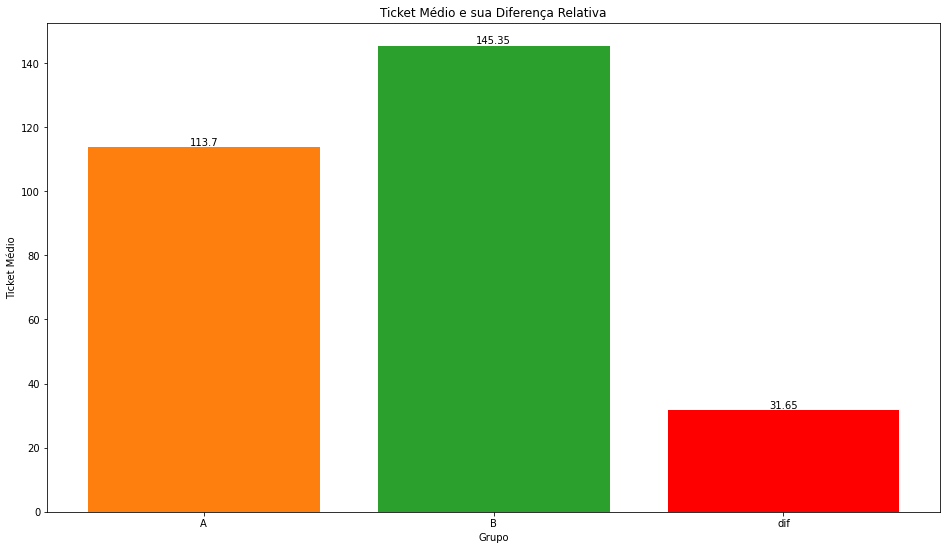

In [791]:
# Gerando gráfico
plt.figure(figsize=(16, 9))

# Criar o gráfico de barras
plt.bar(rev_mean_group['group'], rev_mean_group['revenue'])

# Criar o gráfico de barras
for i, value in enumerate(rev_mean_group['revenue']):
    if rev_mean_group.loc[i, 'group'] == 'dif':
        plt.bar(rev_mean_group.loc[i, 'group'], value, color='red')
    else:
        plt.bar(rev_mean_group.loc[i, 'group'], value)

# Adicionar rótulos para cada barra
for i, value in enumerate(rev_mean_group['revenue']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Configurar título e rótulos dos eixos
plt.title('Ticket Médio e sua Diferença Relativa')
plt.xlabel('Grupo')
plt.ylabel('Ticket Médio')

# Exibir o gráfico
plt.show()

**Conclusão**

Como conclusão podemos tirar que:

* O grupo B teve um ticket médio de 145.35, enquanto o grupo A teve um ticket médio de 113.70.

* A diferença entre os grupos B e A foi de 31.65 no valor do ticket médio.

* A diferença representa aproximadamente 27.8% a mais de receita no grupo B em comparação com o grupo A.

* Os testes realizados indicam que o grupo B gerou mais receita acumulada.

* Esses resultados ressaltam a importância de analisar e comparar os desempenhos de diferentes grupos para identificar variações significativas e tomar decisões estratégicas adequadas.


#### Taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia e taxas de conversão diárias dos dois grupos

Iremos chamar nossas duas dataframes originais para análisar como podemos conectarlas e realizar os cálculos necessários para a geração do gráfico final

In [792]:
# chamando df_visits

df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [793]:
# chamando df_orders

df_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


Primeiramente iremos contar no número de pedidos por dia em nossa df_orders.

Após isso, iremos criar uma nova dataframe que é resultado de join das dfs conectadas pelo grupo e data para calculo e geração dos dados de conversão diárias e gráficos.

Iremos utilizar transactionId para contar a conversão.

In [794]:
# agrupando df_orders por número de pedidos de usuários únicos diários

orders_by_day = df_orders.groupby(['date', 'group'])['transactionId'].count().reset_index()

# Renomeando
orders_by_day = orders_by_day.rename(columns={'transactionId': 'orders'})

# mostrando a df

orders_by_day

,date,group,orders
0,2019-08-01,A,23
1,2019-08-01,B,17
2,2019-08-02,A,19
3,2019-08-02,B,23
4,2019-08-03,A,24
...,...,...,...
57,2019-08-29,B,15
58,2019-08-30,A,9
59,2019-08-30,B,21
60,2019-08-31,A,8


In [795]:
# Juntar as DataFrames
conv_df = pd.merge(orders_by_day, df_visits, on=['date', 'group'])

# Gerar conversão
conv_df['conversion%'] = (conv_df['orders']/conv_df['visits'])*100

# Imprimir o DataFrame resultante
conv_df

,date,group,orders,visits,conversion%
0,2019-08-01,A,23,719,3.198887
1,2019-08-01,B,17,713,2.384292
2,2019-08-02,A,19,619,3.069467
3,2019-08-02,B,23,581,3.958692
4,2019-08-03,A,24,507,4.733728
...,...,...,...,...,...
57,2019-08-29,B,15,531,2.824859
58,2019-08-30,A,9,490,1.836735
59,2019-08-30,B,21,490,4.285714
60,2019-08-31,A,8,699,1.144492


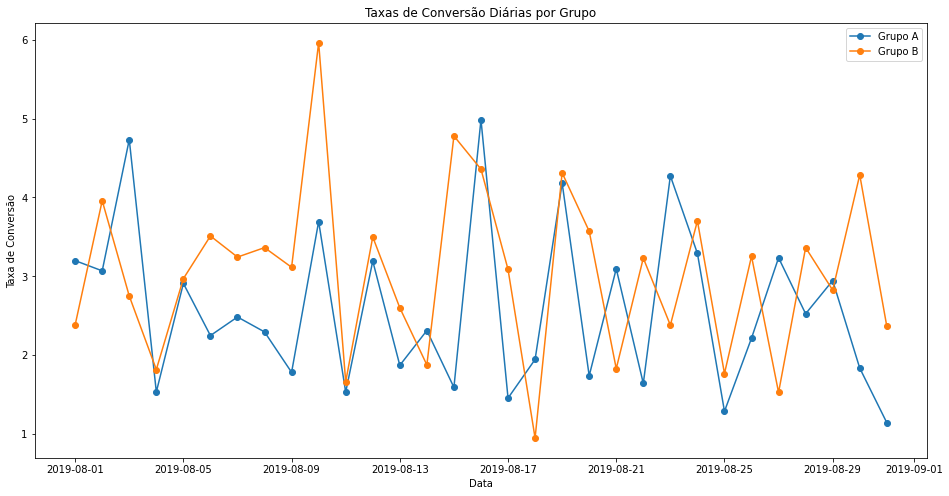

In [796]:
# Separar os grupos A e B
group_A = conv_df[conv_df['group'] == 'A']
group_B = conv_df[conv_df['group'] == 'B']

# Configurar a figura
plt.figure(figsize=(16, 8))

# Traçar as taxas de conversão do grupo A
plt.plot(group_A['date'], group_A['conversion%'], marker='o', label='Grupo A')

# Traçar as taxas de conversão do grupo B
plt.plot(group_B['date'], group_B['conversion%'], marker='o', label='Grupo B')

# Configurar título e rótulos dos eixos
plt.title('Taxas de Conversão Diárias por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

**Conclusão**

Com o gráfico gerado podemos tirar as seguintes conclusões:

* A variação da conversão para ambos os grupos seguem tendências similares, em que, normalmente, onde um grupo tem queda na conversão o outro também.

* O Grupo B começou com menor conversão relativa, mas ao passar do tempo começou a performar melhor, com os pontos, quase sempre, acima do teste A.

* Ao que parece, o grupo B possuí maior volatilidade. Há picos maiores de crescimento e decrescimento que o grupo A. 

* Ao que parece, inicialmente, os usuários do grupo B começaram a utilizar e necessitaram de um tempo para adaptação, por isso, começaram mais abaixo.

* Apesar do Ticket Médio maior, nos parece que a conversão não aumentou conforme o tempo, pois ambas as curvas tem comportamentos parecidos.

#### Gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A

Iremos utilziar a df conv_df para realizar os cálculos de conversão geral.

In [797]:
# agrupando df_orders por número de pedidos de usuários únicos

orders_general = df_orders.groupby('group')['transactionId'].count().reset_index()

# Renomeando
orders_general = orders_general.rename(columns={'transactionId': 'orders'})

# mostrando a df

orders_general


,group,orders
0,A,468
1,B,548


In [798]:
# agrupando visitas gerais por grupos

visits_general = df_visits.groupby('group')['visits'].sum().reset_index()

# Renomeando

visits_general = visits_general.rename(columns={'visits': 'visits_total'})

# mostrando a df

visits_general

,group,visits_total
0,A,18736
1,B,18916


In [799]:
# Juntar as DataFrames
conv_general = pd.merge(orders_general, visits_general, on= 'group')

# Gerar conversão
conv_general['conversion%'] = (conv_general['orders']/conv_general['visits_total'])*100

# Imprimir o DataFrame resultante
conv_general

,group,orders,visits_total,conversion%
0,A,468,18736,2.497865
1,B,548,18916,2.897018


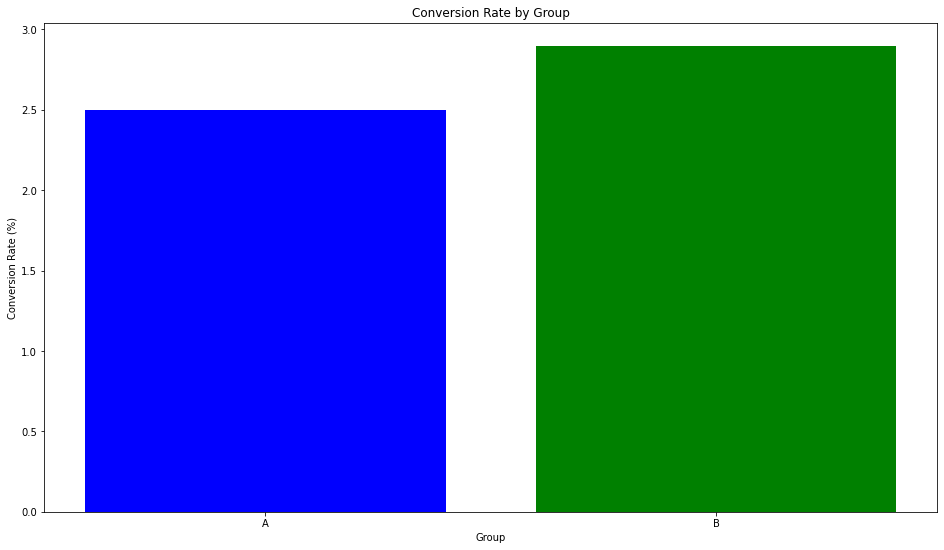

In [800]:
# Cores
colors = ['blue', 'green']

# Gerando gráficos
plt.figure(figsize=(16, 9))
plt.bar(conv_general['group'], conv_general['conversion%'], color=colors)

# Adicionando labels e título
plt.xlabel('Group')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Group')

# Mostrando gráfico
plt.show()

**Conclusões**

Podemos tirar as seguintes conclusões:

* Como visto no gráfico diário de conversão o grupo B tem maior conversão relativa que A.

* A diferença é de 0,4% no valor de conversão. Se avaliar em uma escala de 100 clientes, o grupo B converte 4 vendas a mais que o grupo A. 

* Levando em consideração o último ponto, pode-se dizer que a conversão geral de B é relevante sim. Além de aumentar o ticket médio a mudança aumentou a conversão média de clientes se mostrando uma mudança eficaz.

#### Percentis 95 e 99 para o número de pedidos por usuário e o ponto em que os dados se torna uma anomalia.

Iremos calcular os percentis 95 e 99 utilizando a tabela df_orders.

Para as anomalias, iremos calcular as anomalias de ambos os grupos. Ou seja, iremos criar anomalia1 que são o grupo de users acima de 99. Já a anomalia2 será o grupo de valores acima do percentil 95.

In [801]:
# Calcular o número de pedidos por usuário
orders_per_user = df_orders.groupby('visitorId')['transactionId'].nunique()

# Calcular os percentis 95 e 99
percentile_95 = orders_per_user.quantile(0.95)
percentile_99 = orders_per_user.quantile(0.99)

# Definir o limite para anomalias
limit_anomalia1 = percentile_99
limit_anomalia2 = percentile_95

# Identificar anomalias
anomalia1 = orders_per_user[orders_per_user > limit_anomalia1] # Limite anomalia 1
anomalia2 = orders_per_user[orders_per_user > limit_anomalia2] # Limite anomalia 2

# Imprimir os resultados
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")
print("\n")
print(f"Limite de anomalias 1: {limit_anomalia1}")
print("Anomalias 1:")
print(anomalia1)
print("\n")
print(f"Limite de anomalias 2: {limit_anomalia2}")
print("Anomalias 2:")
print(anomalia2)

Percentil 95: 1.0
Percentil 99: 2.0


Limite de anomalias 1: 2.0
Anomalias 1:
visitorId
249864742     3
611059232     3
2108163459    3
2742574263    3
2988190573    3
3908431265    3
3967698036    3
Name: transactionId, dtype: int64


Limite de anomalias 2: 1.0
Anomalias 2:
visitorId
249864742     3
366673373     2
406208401     2
522292794     2
611059232     3
678354126     2
759473111     2
1404560065    2
1617417821    2
1637811943    2
1772171838    2
1985475298    2
2025197455    2
2096506107    2
2108163459    3
2232111114    2
2306096143    2
2366521417    2
2397843657    2
2706377257    2
2733145037    2
2742574263    3
2744017357    2
2892265953    2
2988190573    3
3077396270    2
3332057097    2
3362039251    2
3379260072    2
3469608676    2
3908431265    3
3935952912    2
3941503500    2
3967698036    3
4109358064    2
4134830387    2
Name: transactionId, dtype: int64


**Conclusão**

A partir dos dados gerados podemos tirar que:

* O percentil 95 tem o valor de até 1 pedido. Ou seja, 95% dos clientes realiza até 1 pedido no período de teste realizado.

* O percentil 99 tem o valor até de 2 pedidos. Ou seja, 99% dos clientes realiza até 2 pedidos.

* Para anomalias, calculamos anomalias para ambos os casos, podemos ver o grupo de anomalias pode ser considerado a partir de percentil 99, pelo tamanho da amostra. 

* Podemos ver que o número de pedidos por cliente é baixo, sendo que a maior parte dos clientes realiza somente 1 pedido no período inteiro. Ou seja, não há uma recorrência de compras. Isso pode ser um fator importante a se analisar.

#### Gráfico de dispersão dos preços dos pedidos

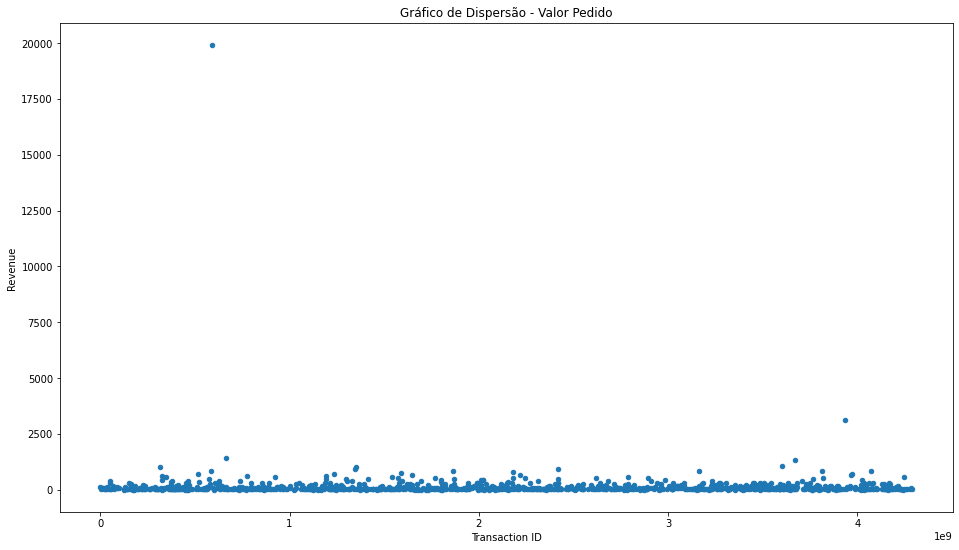

In [802]:
# Gerando gráficos
fig, ax = plt.subplots(figsize=(16, 9))

# Gerar o gráfico de dispersão
df_orders.plot.scatter(x='transactionId', y='revenue', ax=ax)

# Configurar rótulos dos eixos
plt.xlabel('Transaction ID')
plt.ylabel('Revenue')

# Configurar título do gráfico
plt.title('Gráfico de Dispersão - Valor Pedido')

# Exibir o gráfico
plt.show()

**Conclusão**

Pelo gráfico gerado podemos observar que não há grande diferença na dispersão dos preços dos pedidos. Há alguns pontos fora da curva, mas o Ticket médio parece se manter constante entre os usuários, tendo alguns usuários como anomalias e fora do padrão. O maior valor chega a 20.000 o pedido.

#### Percentis 95 e 99 para o preço do pedido e o ponto em que os dados se torna uma anomalia.

Iremos calcular os percentis 95 e 99 utilizando a tabela df_orders.

Para as anomalias, iremos calcular as anomalias de ambos os grupos. Ou seja, iremos criar anomalia1 que são o grupo de users acima de 99. Já a anomalia2 será o grupo de valores acima do percentil 95.

In [803]:
# Calcular o preço de pedidos por usuário
price_percentil = df_orders.groupby('transactionId')['revenue'].sum()

# Calcular os percentis 95 e 99
percentile_95 = price_percentil.quantile(0.95)
percentile_99 = price_percentil.quantile(0.99)

# Definir o limite para anomalias
limit_anomalia1 = percentile_99
limit_anomalia2 = percentile_95

# Identificar anomalias
anomalia1 = price_percentil[price_percentil > limit_anomalia1] # Limite anomalia 1
anomalia2 = price_percentil[price_percentil > limit_anomalia2] # Limite anomalia 2

# Imprimir os resultados
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")
print("\n")
print(f"Limite de anomalias 1: {limit_anomalia1}")
print("Anomalias 1:")
print(anomalia1)
print("\n")
print(f"Limite de anomalias 2: {limit_anomalia2}")
print("Anomalias 2:")
print(anomalia2)

Percentil 95: 414.275
Percentil 99: 830.3


Limite de anomalias 1: 830.3
Anomalias 1:
transactionId
316924019      1015.9
590470918     19920.4
666610489      1425.8
1347999392      930.0
1348774318     1025.8
2420050534      905.8
3603576309     1050.0
3668308183     1335.6
3936777065     3120.1
Name: revenue, dtype: float64


Limite de anomalias 2: 414.275
Anomalias 2:
transactionId
316924019      1015.9
323958042       425.9
324171086       610.7
348143148       575.5
514501382       710.8
573486797       475.5
587872075       830.3
590470918     19920.4
666610489      1425.8
773663763       630.8
922638597       550.9
1192036073      590.1
1192185169      475.5
1234615529      705.3
1295850747      455.8
1347999392      930.0
1348774318     1025.8
1416727054      455.8
1538887006      555.2
1570513684      515.9
1589082866      765.5
1646402801      675.2
1769257333      525.6
1798931686      440.3
1861540412      815.8
1867784682      485.3
2012277167      445.3
2023295336      44

**Conclusão**

A partir dos dados gerados podemos tirar que:

* O percentil 95 tem o valor de até 414,27. Ou seja, 95% dos clientes compra até 414,27 no período de teste realizado.

* O percentil 99 tem o valor até 830.3. Ou seja, 99% dos clientes compra até 830.3.

* Para anomalias, calculamos anomalias para ambos os casos, podemos ver o grupo de anomalias pode ser considerado a partir de percentil 99, pelo tamanho da amostra. 

* Podemos ver que há valores consideráveis para a compra de produtos no site e apesar do ticket médio ser 145, há valores que excedem esse valor.

#### Significância estatística - Testes

Vamos encontrar nessa seção as significâncias estatísticas seguintes:

- significância estatística da diferença na conversão entre os grupos usando os dados brutos.

- significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. 

- significância estatística da diferença na conversão entre os grupos usando os dados filtrados

- significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. 


Como sabemos que nossos dados contem valores atípicos e muito fora do padrão iremos utilizar o teste de Wilcoxon-Mann-Whitney.

##### significância estatística da diferença na conversão entre os grupos usando os dados brutos.

Para utilização dos dados brutos iremos carregar novamente os dados de em nossa raíz para coletar os dados brutos.

In [804]:
# abrindo a tabela orders_us.csv

# Carregando dados no computador pessoal
try:
    df_orders2 = pd.read_csv(r'download/datasets/orders_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_orders2 = pd.read_csv(r'/datasets/orders_us.csv')

In [805]:
# abrindo a tabela visitors_us.csv.

# Carregando dados no computador pessoal
try:
    df_visits2 = pd.read_csv(r'download/datasets/visitors_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_visits2 = pd.read_csv(r'/datasets/visitors_us.csv')

In [806]:
# agrupando df_orders por número de pedidos de usuários únicos diários

orders_by_day2 = df_orders2.groupby(['date', 'group'])['transactionId'].count().reset_index()

# Renomeando
orders_by_day2 = orders_by_day2.rename(columns={'transactionId': 'orders'})

# mostrando a df

orders_by_day2

,date,group,orders
0,2019-08-01,A,24
1,2019-08-01,B,21
2,2019-08-02,A,20
3,2019-08-02,B,24
4,2019-08-03,A,24
...,...,...,...
57,2019-08-29,B,20
58,2019-08-30,A,11
59,2019-08-30,B,24
60,2019-08-31,A,12


In [807]:
# Juntar as DataFrames
conv_df2 = pd.merge(orders_by_day2, df_visits2, on=['date', 'group'])

# Gerar conversão
conv_df2['conversion%'] = (conv_df2['orders']/conv_df2['visits'])*100

# Imprimir o DataFrame resultante
conv_df2

,date,group,orders,visits,conversion%
0,2019-08-01,A,24,719,3.337969
1,2019-08-01,B,21,713,2.945302
2,2019-08-02,A,20,619,3.231018
3,2019-08-02,B,24,581,4.130809
4,2019-08-03,A,24,507,4.733728
...,...,...,...,...,...
57,2019-08-29,B,20,531,3.766478
58,2019-08-30,A,11,490,2.244898
59,2019-08-30,B,24,490,4.897959
60,2019-08-31,A,12,699,1.716738


In [808]:
# Dividir os dados em dois grupos
group_a = conv_df2[conv_df2['group'] == 'A']['conversion%']
group_b = conv_df2[conv_df2['group'] == 'B']['conversion%']

alpha = .05 # nível de significância crítico

# Teste de Wilcoxon-Mann-Whitney
results = st.mannwhitneyu(group_a, group_b, True, 'less')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótese nula rejeitada: a diferença possui significância estatística")
else:
    print("Falha ao rejeitar a hipótese nula: não é possível chegar a uma conclusão sobre a diferença")

p-value:  0.042936080165038866
Hipótese nula rejeitada: a diferença possui significância estatística


##### significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos

In [809]:
# mostrando df de uso
df_orders2

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [810]:
# Dividir os dados em dois grupos
group_a2 = df_orders2[df_orders2['group'] == 'A']['revenue']
group_b2 = df_orders2[df_orders2['group'] == 'B']['revenue']

alpha = .05 # nível de significância crítico

# Teste de Wilcoxon-Mann-Whitney
results = st.mannwhitneyu(group_a2, group_b2, True, 'less')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótese nula rejeitada: a diferença possui significância estatística")
else:
    print("Falha ao rejeitar a hipótese nula: não é possível chegar a uma conclusão sobre a diferença")

p-value:  0.3457623386632368
Falha ao rejeitar a hipótese nula: não é possível chegar a uma conclusão sobre a diferença


##### significância estatística da diferença na conversão entre os grupos usando os dados filtrados.

In [811]:
# Dividir os dados em dois grupos
group_a = conv_df[conv_df['group'] == 'A']['conversion%']
group_b = conv_df[conv_df['group'] == 'B']['conversion%']

alpha = .05 # nível de significância crítico

# Teste de Wilcoxon-Mann-Whitney
results = st.mannwhitneyu(group_a, group_b, True, 'less')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótese nula rejeitada: a diferença possui significância estatística")
else:
    print("Falha ao rejeitar a hipótese nula: não é possível chegar a uma conclusão sobre a diferença")

p-value:  0.026878539452366065
Hipótese nula rejeitada: a diferença possui significância estatística


##### significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados

In [812]:
 # Dividir os dados em dois grupos
group_a2 = df_orders[df_orders['group'] == 'A']['revenue']
group_b2 = df_orders[df_orders['group'] == 'B']['revenue']

alpha = .05 # nível de significância crítico

# Teste de Wilcoxon-Mann-Whitney
results = st.mannwhitneyu(group_a2, group_b2, True, 'less')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótese nula rejeitada: a diferença possui significância estatística")
else:
    print("Falha ao rejeitar a hipótese nula: não é possível chegar a uma conclusão sobre a diferença")

p-value:  0.5689678091666772
Falha ao rejeitar a hipótese nula: não é possível chegar a uma conclusão sobre a diferença


##### Conclusões

Com os dados gerados podemos ver os seguintes fatores:

* Em comparação dos mesmos testes entre a conversão dos grupos filtrados e não filtrados podemos ver uma variação do p-valor retirado das análises. É interessante observar que a ordem de significância é alta dada que a não filtrada ficou em 0,042 e filtrada em 0,026. 

* Ao análisar o comparativo entre os p-valores citados anteriormente vemos como é importante a boa prática e boa análise de limpeza de dados para nossos testes, eles podem afetar consideravelmente os erros gerados sendo que, no teste com os dados não filtrados quase que a hipótese Falhou a rejeitar.

* A comparação do ticket médio entre os grupos nos dados filtrados e não filtrados também demosntraram diferenças significativas onde o não filtrado apresenteou p-valor em 0,34 e o filtrado em 0,56.

* Tal diferença é de grande expressividade, visto que, temos uma diferença de 0,2 no pvalor. A magnitude é muito alta

* Apesar dos erros, podemos ver que em ambos os grupos o seguinte

    - A conversão de fato muda entre os grupos
    - O ticket médio não muda entre os grupos

##### Seção extra - Análise de viabilidade de teste

Com os dados que coletamos durante nossa análise iremos realizar um teste extra para averiguar se o teste A/B foi bem realizado durante o período.

Iremos usar os seguintes dados:

- conversão média dos dados filtrados;

- há 2 grupos de teste

- visitantes médios diários

- quantidade de pessoas no grupo B (teste)

Iremos utilizar a ferramenta do website https://vwo.com/tools/ab-test-duration-calculator/ para averiguar o tempo necessário e comparar com o que foi realizado.

In [813]:
# conversão média geral
conv_general_num = conv_general['conversion%'].mean()
print(f'A conversão média geral é {conv_general_num}')

# visitantes médios diários
visits_daily = df_visits.groupby('date')['visits'].sum().reset_index()
visits_daily_num = visits_daily['visits'].mean()
print(f'O número de visitas diárias médias é de {visits_daily_num}')

# quantidades de pessoas no grupo B
group_a_sum = df_visits[df_visits['group'] == 'A']['visits'].sum()
group_b_sum = df_visits[df_visits['group'] == 'B']['visits'].sum()

person_rate = group_b_sum / group_a_sum

print(f'O rate é de {person_rate}')

A conversão média geral é 2.69744173485583
O número de visitas diárias médias é de 1214.5806451612902
O rate é de 1.0096071733561058


Logo iremos considerar os seguines dados:

- conversão média de 2,7

- número de visitas diárias médias de 1214 visitas diárias

- o teste está dividido em 50%

- A diferença percentual das conversões é de aproximadamente 16%.

**Conclusão**

Ao realizar o teste temos que:

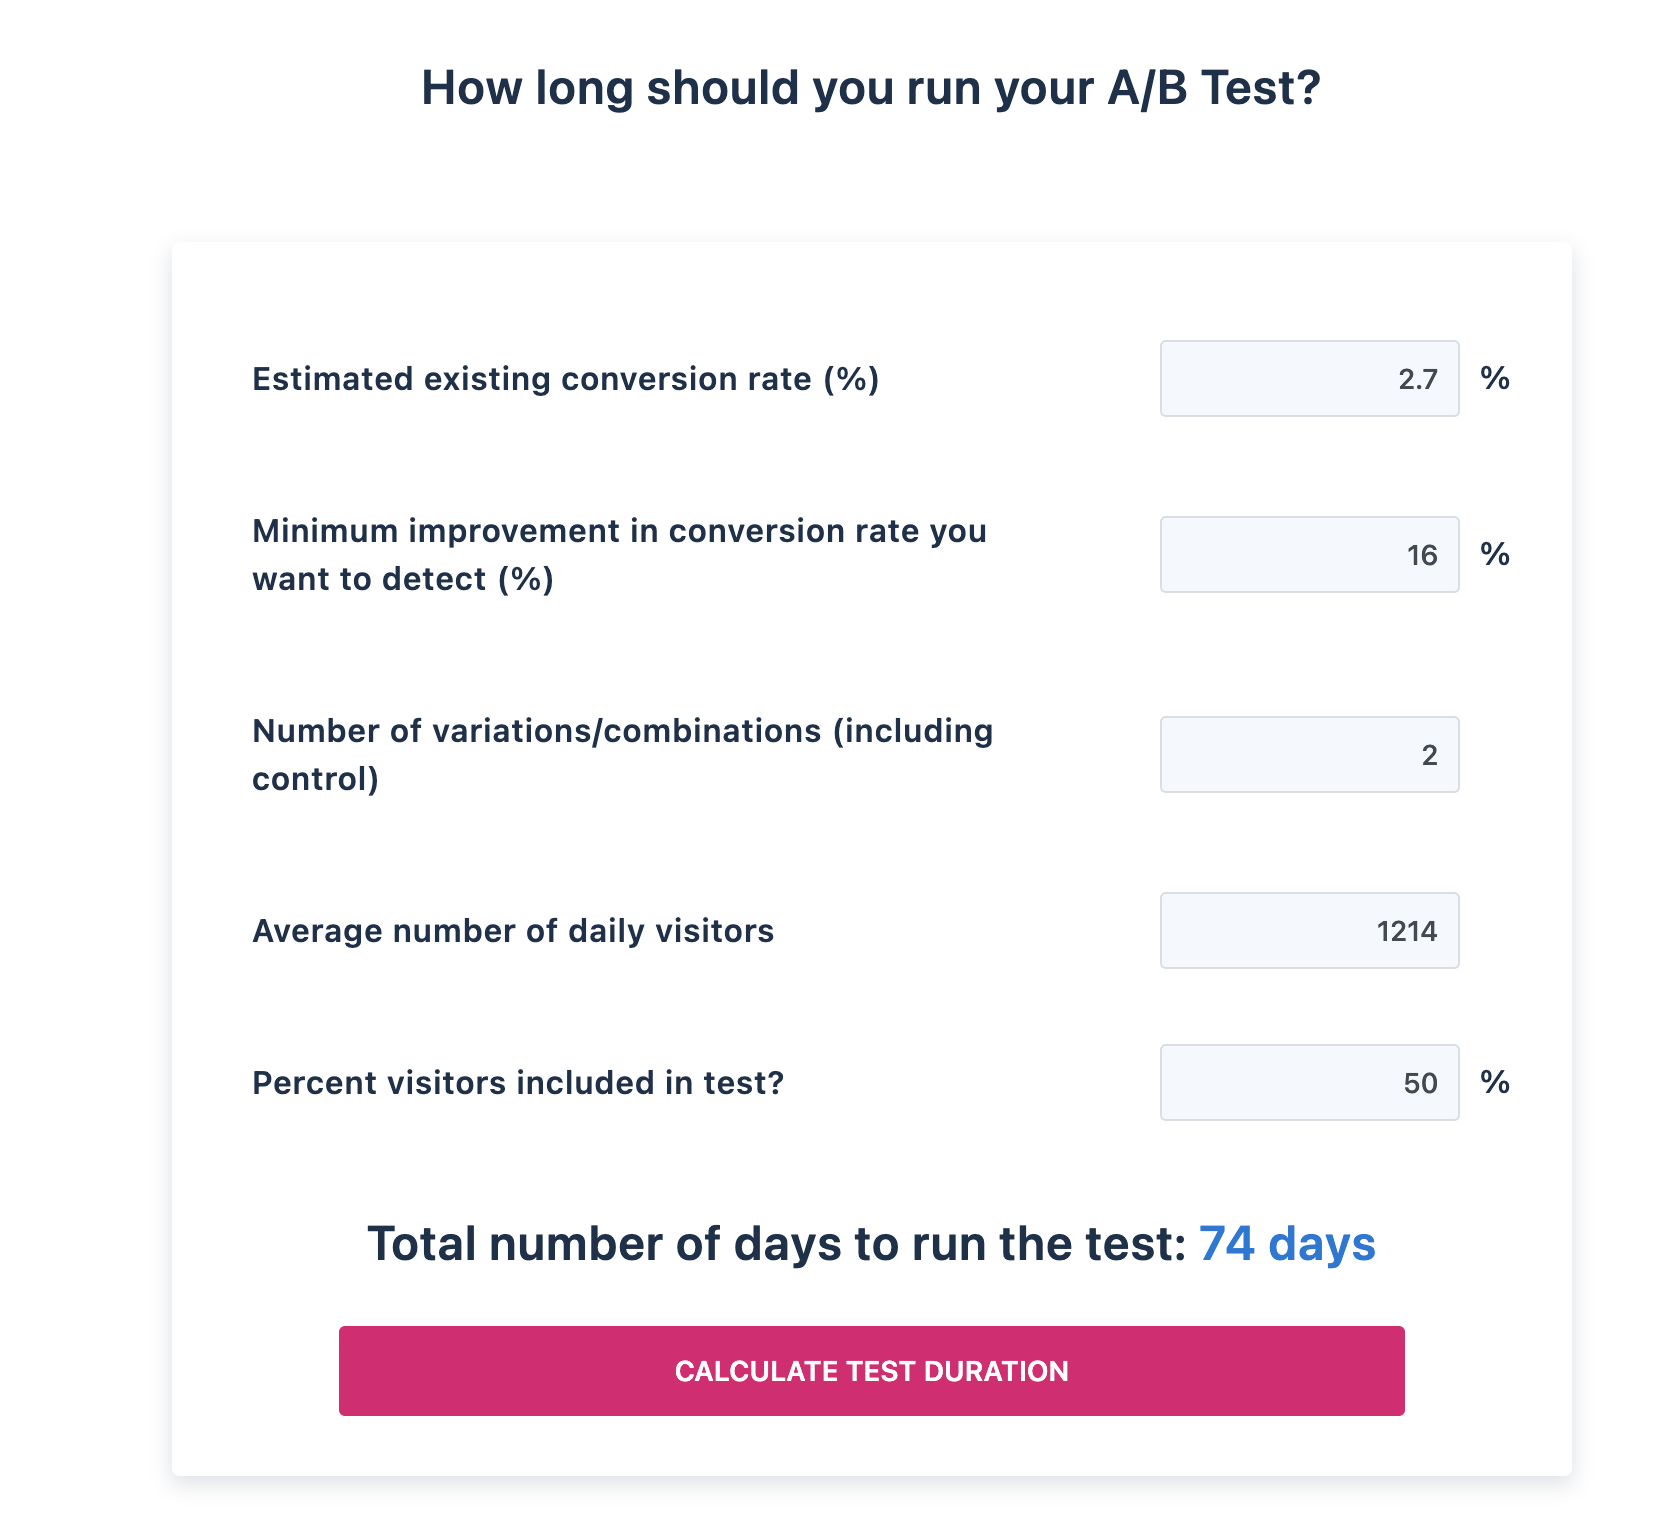

Assim teriamos que ter o teste por 74 dias. Iremos calcular por quanto tempo o teste foi rodado de fato

In [814]:
# calculando o tempo de teste
days = (df_visits['date'].max() - df_visits['date'].min()).days

print(f'O tempo de teste é de {days} dias.')

O tempo de teste é de 30 dias.


**Conclusão**

Pelos testes podemos ver que foi rodado por 30 dias, sendo que o recomendado seria 74 dias de teste para resultados concisos. Isso seria o dobro do tempo.

### Conclusão



A partir da análise detalhada dos dados, concluímos que:

O Grupo B mostrou um desempenho superior em termos de geração de receita em comparação com o Grupo A, representando aproximadamente 60% do total da receita acumulada. Observamos uma diferença interessante de 20% na receita entre os dois grupos. Além disso, o ticket médio do Grupo B foi maior, o que sugere que a receita do Grupo B pode estar sendo impulsionada pelo aumento do ticket médio. No entanto, ambos os grupos apresentaram tendências similares em termos de conversão, com o Grupo B apresentando inicialmente uma taxa de conversão mais baixa, mas superando o Grupo A com o passar do tempo.

A volatilidade observada no Grupo B, em termos de picos e quedas, pode ser atribuída ao fato de que os usuários desse grupo precisaram de um período de adaptação. Apesar de um ticket médio mais elevado, a conversão não parece ter aumentado com o tempo. No entanto, é importante ressaltar que mesmo com uma diferença de 0,4% na taxa de conversão, o Grupo B demonstrou uma maior conversão relativa, conseguindo 4 vendas a mais a cada 100 clientes em comparação com o Grupo A. Isso indica que a mudança para o Grupo B não só aumentou o ticket médio, mas também a taxa de conversão média, mostrando-se como uma estratégia eficaz.

Na análise da frequência de pedidos por cliente, descobrimos que a maioria dos clientes realiza apenas um pedido durante todo o período de teste, o que sugere a falta de compras recorrentes. Isso é algo que merece ser investigado e melhorado.

Embora tenhamos notado alguns pontos fora da curva no gráfico de preços dos pedidos, o ticket médio parece se manter constante entre os usuários. Com um ticket médio de 145, é importante notar que há clientes que excedem esse valor, apontando para um potencial de receita maior.

Por fim, observamos variações significativas nos p-valores entre os conjuntos de dados filtrados e não filtrados, demonstrando a importância de uma limpeza de dados cuidadosa para as nossas análises. A conversão foi confirmada como um elemento variável entre os grupos em ambos os cenários, enquanto o ticket médio manteve-se constante.

Em suma, o Grupo B demonstrou um desempenho superior em termos de geração de receita e taxa de conversão, sugerindo que se focar nesse grupo pode ser uma estratégia benéfica. No entanto, devemos levar em consideração a importância de um processamento de dados cuidadoso para evitar distorções nos resultados, e a necessidade de promover a recorrência de compras para aumentar ainda mais a rentabilidade.


-----------------------------------------

**Recomendação final de teste:**

Apesar de todas as conclusões geradas pelos testes obtidos parecerem mostrar que o grupo B melhorou a receita de maneira significativa e teve um leve aumento na conversão no período recomendamos que a **continuação de teste** por mais tempo, pois ao analisarmos o tempo médio do teste A/B com os dados retirados das análises na [Seção extra - Análise de viabilidade de teste] podemos ver que para a diferença de conversão que obtivemos teriamos que ter um tempo mínimo de 74 dias ao contrário dos 30 dias observados.

Logo, o correto seria correr o teste por mais 34 dias e analisar se a conversão, de fato, estabeleceu ou cresceu em comparação com os dados obtidos, assim teremos mais certeza que o teste foi realizado de maneira correta e de que a funcionalidade implementada em no grupo B é de fato real e traz melhorias concretas.